<a href="https://colab.research.google.com/github/KandarpChaudhary/Wind_Mill_Power_Prediction/blob/main/Windmill_Power_Prediction_Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a id="0">Index</a>
| | | | |
|:--|:--|:--|:--|
|[I. Problem Statement](#1)|[1) Reading the train data](#6)|[3.3) Forward Selection](#11)|[7) XGBoost model](#16)|
|[II. Objective](#2)|[2) Reading the test data](#7)|[3.4)Backward Elimination](#12)|[8) CatBoost model](#17)|
|[III. Problem solving approach](#3)|[3) Fitting the Linear Regression models](#8)|[4) Decision Tree model](#13)|[9) LGBoost model](#18)|
|[IV. Attribute Information](#4)|[3.1) Simple Linear Regression](#9)|[5) Bagging model](#14)|[10) Testing of Models](#19)|
|[V. Installing & Importing Libraries](#5)|[3.2) Multiple Linear Regression](#10)|[6) Random Forest model](#15)|[11) Results](#20)|

### <a id='1'>I. Problem Statement:</a>

> <div style="text-align: justify">It is the year 2022 and we are at the verge of a massive climatic change. With global warming at its peak and fossil fuels inching towards its extinction, it is the need of the hour to step up and take responsibility for our planet. Developing countries all over the world are making a shift towards a cleaner energy source and are looking at ways to expand their global energy source power.</div>
> <div style="text-align: justify">Switching to renewable energy sources is a great way to reduce dependency on imported fuels and increase cost efficiency. It is time we move towards a low-carbon future by embracing solar, hydro, geothermal energy and so on, to protect mother nature.</div>
> <div style="text-align: justify">An efficient energy source that has been gaining popularity around the world is wind turbines. Wind turbines generate power by capturing the kinetic energy of the wind. Factors such as temperature, wind direction, turbine status, weather, blade length, and so on influence the amount of power generated.</div>

https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/

### <a id='2'>II. Objective: </a>

> <div style="text-align: justify">The objective is to build a sophisticated Machine Learning model that predicts the power that is generated (in KW/h) based on the various features provided in the dataset. To analyze and implement multiple algorithms and determine which is more appropriate for a problem To get hands-on experience in Machine Learning problems. For this project I have started the code with simple & easy to understand syntax without utilizing much functions from libraries and then gradually started to implement them at most of the places as we move towards complex models.</div>

### <a id='3'>III. Problem solving approach:</a>

0. <div style="text-align: justify">Splitting the data into train and test in 80:20 ratio. (Ratio can be modified based on rows of the dataset.)</div>

> - Every step from 1 to 5 needs to be performed without expoure to test data.
1. <div style="text-align: justify">Questioning the data - Understanding the variables very carefully and formulating
questions/hypothesis. (Note : These are just initial hypothesis which may or may not seem to be
true after the EDA step.)</div>
2. <div style="text-align: justify">EDA - Exploring the dataset very carefully by doing univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Reporting the surprising elements (i.e. the one which were believed would be true in step 1 did not turn out to be true, or a result that was beyond expectation, etc.)</div>
3. <div style="text-align: justify">Missing value imputation using various methods such as mean,median or KNN imputation</div>
4. <div style="text-align: justify">Feature engineering - Suggesting some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons. Feature engineering. Suggesting some new feature generation techniques (e.g.: creating dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature).</div>
5. <div style="text-align: justify">Model fitting step - Fitting various regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets. Reporting k-fold cross-validation MAE, RMSE, R-squared and adjusted R-squared values. Choosing best model using hyperparameter tuning.</div>
6. <div style="text-align: justify">Model testing - Consider the best competing models from each algorithm and test their performances on the test data. Report the results.</div>

In [98]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>
#Code to left align Markdown tables

[Go to Index](#0)

### <a id='4'>IV. Attribute Information:</a>

|Column Name                       |Meaning|
|:---------------------------------|:------|
|tracking_id                       |ID of the Wind Turbine|
|datetime                          |Date and Time|
|wind_speed(m/s)                   |Speed of wind in m/s|
|atmospheric_temperature(°C)       |Atmospheric temperature in degree Celcius|
|shaft_temperature(°C)             |Wind Mill shaft temperature in degree Celcius |
|blades_angle(°)                   |Angle of blades in degree|
|gearbox_temperature(°C)           |Gear box temperature in degree Celcius|
|engine_temperature(°C)            |Engine temperature in degree Celcius|
|motor_torque(N-m)                 |Torque of Motor in N.m |
|generator_temperature(°C)         |Generator temperature in degree Celcius|
|atmospheric_pressure(Pascal)      |Atmospheric Pressure in Pascal|
|area_temperature(°C)              |Area temperature in degree Celcius|
|windmill_body_temperature(°C)     |Wind Mill body temperature in degree Celcius|
|wind_direction(°)                 |Wind direction in degree|
|resistance(ohm)                   |Winding resistance in Ohm|
|rotor_torque(N-m)                 |Rotor torque in N.m|
|turbine_status                    |Turbine Status(AAA, A2, AB, AC, A, ABC, BBB, BA, BB, B2, BCB, BD, B, D)|
|cloud_level                       |Cloud Level (Extremely Low, Low, Medium)|
|blade_length(m)                   |Length of blades in m|
|blade_breadth(m)                  |Bredth of blades in m|
|windmill_height(m)                |Height of Wind mill in m|
|windmill_generated_power(kW/h)    |Power generated by wind mill in kW/h|

> - <b>Note:</b> Column names have been slightly modified during EDA process done in R. To see the EDA process done on the original data please go through this jupyter notebook.
> - This notebook is focused on the various regression model fitting process only.

[Go to Index](#0)

### <a id='5'>V. Installing & Importing Libraries:</a>

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [99]:
#Importing the necessary Libraries
import pandas as pd                                     #Pandas module mainly works with the tabular data             
import numpy as np                                      #NumPy module works with the numerical data
import seaborn as sns
import matplotlib.pyplot as plt                         #plotting libraries to plot the necessary graphs for EDA
import plotly.express as px                             #plotting libraries to plot the necessary graphs for EDA
import sklearn                                          #importing machine learning libraries
import statsmodels.api as stm   
from sklearn import linear_model
from sklearn.model_selection import cross_val_score     #for cross validation score calculation                       
from sklearn.tree import DecisionTreeRegressor          #for regression using decision tree
from sklearn.metrics import r2_score                    #to calculate R-squared value
from sklearn.metrics import mean_squared_error          #to calculate MSE value
from sklearn.metrics import mean_absolute_error         #to calculate MAE value
from sklearn.model_selection import train_test_split    #for doing test & train split of data
import sklearn.ensemble as ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector                 #importing the library for forward feature selection
import xgboost as xgb
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Go to Index](#0)

### <a id='6'>1) Reading the train data </a> 

In [100]:
train = "https://raw.githubusercontent.com/KandarpChaudhary/Wind_Mill_Power_Prediction/main/Windmill_train_clean.csv"
df_train = pd.read_csv(train)                         #reading the cleaned train data from the repositry
df_train.shape                                        #checking the shape of the data

(22394, 23)

(22394, 23)

In [101]:
df_train.head(2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_24537,2019-05-25 12:53:20,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,...,218.229315,1246.371082,13.207233,AB,Low,8.300782,0.381435,26.538651,5.327000,True
1,WM_11995,2019-02-02 12:53:20,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,...,313.837094,1953.054819,47.481954,BB,Medium,3.935231,0.471872,24.945305,13.769339,False


,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_24537,2019-05-25 12:53:20,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,...,218.229315,1246.371082,13.207233,AB,Low,8.300782,0.381435,26.538651,5.327000,True
1,WM_11995,2019-02-02 12:53:20,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,...,313.837094,1953.054819,47.481954,BB,Medium,3.935231,0.471872,24.945305,13.769339,False


[Go to Index](#0)

### <a id='7'>2) Reading the test data</a>

In [6]:
test = "https://raw.githubusercontent.com/KandarpChaudhary/Wind_Mill_Power_Prediction/main/Windmill_test_clean.csv"
df_test = pd.read_csv(test)                          #reading the cleaned test data from the repositry
df_test.shape                                        #checking the shape of the data

(5599, 23)

In [7]:
df_test.head(2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_51,2018-10-29 05:33:20,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,...,152.663492,1976.228314,104.686191,D,Medium,1.216556,0.491366,25.361037,9.29106,True
1,WM_1441,2018-11-11 08:53:20,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,...,271.147652,1698.318235,32.664450,BA,Medium,3.588249,0.357759,26.545724,3.96375,False


In [8]:
df_train.columns                  #listing the colummn names in the training data

Index(['tracking_id', 'datetime', 'speed_wind', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'body_temperature_windmill',
       'direction_wind', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power', 'atmospheric_temperature_imp'],
      dtype='object')

In [9]:
df_test.columns                  #listing the colummn names in the testing data

Index(['tracking_id', 'datetime', 'speed_wind', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'body_temperature_windmill',
       'direction_wind', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power', 'atmospheric_temperature_imp'],
      dtype='object')

> - atmospheric_temperature_imp column was created during the KNN imputation in R. We drop this column from our dataset
> - turbine_status column will be dropped as I could not find any meaning for those different category.

In [10]:
#creating seperate dataframe without tracking_id, datetime, turbine_status and atmospheric_temperature_imp columns.
data_train = df_train.drop(columns = ["tracking_id", "datetime","turbine_status","atmospheric_temperature_imp"])
#rearranging the columns in the dataframe
data_train = data_train[['speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'blade_length',
       'blade_breadth', 'height_windmill', 'cloud_level', 'windmill_generated_power']]
data_train.head(2)

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,cloud_level,windmill_generated_power
0,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,95456.049051,22.861485,42.700917,218.229315,1246.371082,13.207233,8.300782,0.381435,26.538651,Low,5.327000
1,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,94989.383195,37.057648,46.512083,313.837094,1953.054819,47.481954,3.935231,0.471872,24.945305,Medium,13.769339


In [11]:
#creating seperate dataframe without tracking_id, datetime, turbine_status and atmospheric_temperature_imp columns.(test datset)
data_test = df_test.drop(columns = ["tracking_id", "datetime","turbine_status","atmospheric_temperature_imp"])
#rearranging the columns in the dataframe
data_test = data_test[['speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'blade_length',
       'blade_breadth', 'height_windmill', 'cloud_level', 'windmill_generated_power']]
data_test.head(2)

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,cloud_level,windmill_generated_power
0,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,94983.274938,48.767466,43.281459,152.663492,1976.228314,104.686191,1.216556,0.491366,25.361037,Medium,9.29106
1,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,94978.385597,47.591146,43.281459,271.147652,1698.318235,32.664450,3.588249,0.357759,26.545724,Medium,3.96375


In [12]:
data = data_train.copy()             #copying the training data to a new dataframe

In [13]:
data.corr()                          #Finding the correlation between the features

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power
speed_wind,1.000000,0.327368,0.045923,-0.002996,0.036781,0.163508,0.400452,0.456577,-0.130756,0.214344,0.054874,-0.109364,0.282356,0.202933,0.011380,0.011480,-0.017940,0.067863
atmospheric_temperature,0.327368,1.000000,0.102002,0.020987,0.063555,0.286261,0.504045,0.607709,-0.157088,0.407500,0.121584,-0.226623,0.372349,0.245830,0.012100,-0.004281,-0.004985,0.003126
shaft_temperature,0.045923,0.102002,1.000000,-0.019933,0.070928,0.293558,0.103138,0.109934,-0.026533,0.134266,0.090285,-0.037022,0.062962,0.057792,0.008284,-0.006122,-0.004718,0.064228
blades_angle,-0.002996,0.020987,-0.019933,1.000000,-0.028705,-0.063427,-0.142274,-0.048102,0.007240,-0.077790,0.014521,-0.046563,-0.040101,-0.062855,-0.028960,-0.060543,0.002829,-0.154434
gearbox_temperature,0.036781,0.063555,0.070928,-0.028705,1.000000,0.211760,0.084602,0.082786,-0.012652,0.093804,0.064570,-0.021660,0.051892,0.044549,-0.000511,0.008955,0.003670,0.083821
engine_temperature,0.163508,0.286261,0.293558,-0.063427,0.211760,1.000000,0.354177,0.363897,-0.059942,0.339212,0.279119,-0.134664,0.240514,0.177619,0.008574,0.010347,-0.014370,0.272345
motor_torque,0.400452,0.504045,0.103138,-0.142274,0.084602,0.354177,1.000000,0.934042,-0.204670,0.467903,0.092940,-0.161600,0.591935,0.462392,0.025454,0.057888,-0.006502,0.506948
generator_temperature,0.456577,0.607709,0.109934,-0.048102,0.082786,0.363897,0.934042,1.000000,-0.227742,0.512491,0.113785,-0.230402,0.621134,0.444243,0.016471,0.020494,-0.007344,0.392140
atmospheric_pressure,-0.130756,-0.157088,-0.026533,0.007240,-0.012652,-0.059942,-0.204670,-0.227742,1.000000,-0.081499,-0.019243,0.050440,-0.144945,-0.090931,-0.009603,0.002404,0.005105,-0.008365
area_temperature,0.214344,0.407500,0.134266,-0.077790,0.093804,0.339212,0.467903,0.512491,-0.081499,1.000000,0.129902,-0.185693,0.304805,0.221370,0.012792,0.029299,-0.009343,0.385182


[Go to Index](#0)

### <a id='8'>3) Fitting the Linear Regression models</a>

#### <a id='9'>3.1) Simple Linear Regression</a>

Creating a simple Linear Regression model where we our fixing our target variable to windmill_generated_power and through a for loop we are iterating through all the columns in the dataset and finding out the cross validation score for R-square,RMSE and MAE metrics.

In [14]:
SLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(0,np.shape(data.columns)[0]-2):  #iterating through all columns of dataset except id,date and price.
    scores1 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='r2', n_jobs=-1)                          #cv score with R-square metric
    scores2 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='neg_root_mean_squared_error', n_jobs=-1) #cv score with RMSE metric
    scores3 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='neg_mean_absolute_error', n_jobs=-1)     #cv score with MAE metric
    SLR_list.append([data.columns[i],scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])   #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
SLR_Result = pd.DataFrame(SLR_list, columns = ["Predictor","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
SLR_Result = SLR_Result.sort_values("R2", ascending=False)       #sorting a dataframe by R2 column
SLR_Result 

,Predictor,R2,RMSE,MAE
6,motor_torque,0.256518,2.332781,1.861701
7,generator_temperature,0.153259,2.489550,1.994147
9,area_temperature,0.147508,2.497838,1.977216
12,resistance,0.074245,2.603155,2.080381
5,engine_temperature,0.073747,2.603926,2.117946
13,rotor_torque,0.050428,2.636488,2.116844
3,blades_angle,0.023285,2.673882,2.151966
15,blade_breadth,0.007469,2.695443,2.182470
4,gearbox_temperature,0.006490,2.696790,2.177671
0,speed_wind,0.003903,2.700270,2.180438


In [15]:
SLR_list = list(SLR_Result.iloc[:,0])           #slicing the predictor column from SLR_Result dataframe
SLR_list.append('windmill_generated_power')     #appending the price to SLR_List    
df_1 = data.loc[:,SLR_list]                     #creating a dataframe with SLR_List elements as columns
df_1

,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,windmill_generated_power
0,822.481889,38.473050,22.861485,1246.371082,42.430519,13.207233,0.141416,0.381435,40.254733,1.772478,-7.188719,218.229315,8.300782,42.700917,95456.049051,26.538651,0.868046,5.327000
1,2839.818485,92.687648,37.057648,1953.054819,43.948129,47.481954,14.359578,0.471872,49.450861,9.682917,43.230546,313.837094,3.935231,46.512083,94989.383195,24.945305,17.556230,13.769339
2,783.336629,38.389250,27.141329,1213.762445,42.780595,75.872722,-99.000000,0.423538,41.283494,13.621533,41.908392,211.418321,3.634979,42.152071,95456.591535,27.179574,12.225137,4.653317
3,2462.892331,75.785483,43.115992,1793.423865,45.448606,39.874035,-1.303381,0.472443,23.077281,9.677077,46.760040,281.940488,3.588249,46.447843,94981.529368,24.512904,29.389378,6.242050
4,820.095464,40.228096,35.395953,1249.298814,42.984046,13.930545,-146.259543,0.477952,43.095891,1.990549,45.029645,265.470437,3.113394,41.749738,95488.640876,30.709111,11.665583,5.640274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22389,2768.572328,90.818861,47.234331,1963.687804,47.720643,45.592438,8.934412,0.446721,43.410321,9.580309,47.059804,150.369996,2.432157,45.383396,94983.570796,18.195162,28.164219,9.638072
22390,2568.299740,75.429751,28.327598,1871.758543,44.576726,40.005875,-1.181091,0.475222,45.273151,9.301166,74.200750,283.321772,9.551281,42.312827,94981.271346,25.297797,20.462774,7.956100
22391,2117.912224,71.260275,26.533481,2663.336874,42.717776,85.350760,-0.941538,0.477113,41.968212,9.177004,41.609807,225.199515,3.417728,40.947041,94978.449482,30.373202,21.905727,5.264841
22392,2892.444097,94.049498,40.869727,1990.248457,45.002920,46.133078,10.290330,0.440066,44.411914,9.537239,45.413325,143.222035,2.993950,43.281459,94992.222241,26.834483,24.827847,11.603679


In [16]:
print(SLR_list)

['motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', 'windmill_generated_power']


In [17]:
df_2 = data_test.loc[:,SLR_list]                     #creating a dataframe with SLR_List elements as columns
df_2.head()

,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,windmill_generated_power
0,2859.880400,86.736871,48.767466,1976.228314,43.447832,104.686191,5.952436,0.491366,69.517702,9.638635,14.115891,152.663492,1.216556,43.281459,94983.274938,25.361037,49.323656,9.291060
1,2040.684223,70.161484,47.591146,1698.318235,41.115060,32.664450,0.786710,0.357759,42.013690,9.526949,5.089377,271.147652,3.588249,43.281459,94978.385597,26.545724,25.834128,3.963750
2,906.744353,41.469022,33.287076,1352.657976,44.173029,16.097340,-1.166295,0.454186,42.430585,3.412995,67.110962,271.147652,3.254225,43.281459,95469.780036,24.981134,12.741752,7.806675
3,2095.761541,71.403367,38.796153,774.412134,43.560637,36.332721,-0.045437,0.448268,42.283525,9.455225,42.992671,271.147652,4.991204,43.281459,94979.691703,25.994887,6.042805,3.806290
4,502.483282,34.977778,17.945284,1172.554732,4.466950,5.000000,92.738617,0.306947,3.100735,1.000000,8.523732,300.181509,4.854599,17.959089,95425.370252,25.284007,4.657620,7.549805


[Go to Index](#0)

#### <a id='10'>3.2) Multiple Linear Regression</a>

Creating a Multiple Linear Regression model where we our fixing our target variable to windmill_generated_power and through a for loop we are adding a new predictor in each iteration and finding out the cross validation score for R-square,RMSE and MAE metrics. We are making a DataFrame which consists of predictors used and the cv score metrics.

In [18]:
data = pd.get_dummies(data, columns=["cloud_level"], drop_first=True)               #encoding the categorical variable into a dummy variable
data.head()

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power,cloud_level_Low,cloud_level_Medium
0,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,95456.049051,22.861485,42.700917,218.229315,1246.371082,13.207233,8.300782,0.381435,26.538651,5.327000,1,0
1,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,94989.383195,37.057648,46.512083,313.837094,1953.054819,47.481954,3.935231,0.471872,24.945305,13.769339,0,1
2,13.621533,12.225137,41.908392,-99.000000,41.283494,42.780595,783.336629,38.389250,95456.591535,27.141329,42.152071,211.418321,1213.762445,75.872722,3.634979,0.423538,27.179574,4.653317,0,1
3,9.677077,29.389378,46.760040,-1.303381,23.077281,45.448606,2462.892331,75.785483,94981.529368,43.115992,46.447843,281.940488,1793.423865,39.874035,3.588249,0.472443,24.512904,6.242050,1,0
4,1.990549,11.665583,45.029645,-146.259543,43.095891,42.984046,820.095464,40.228096,95488.640876,35.395953,41.749738,265.470437,1249.298814,13.930545,3.113394,0.477952,30.709111,5.640274,1,0


In [19]:
data_test = pd.get_dummies(data_test, columns=["cloud_level"], drop_first=True)               #encoding the categorical variable into a dummy variable
data_test.head()

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power,cloud_level_Low,cloud_level_Medium
0,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,94983.274938,48.767466,43.281459,152.663492,1976.228314,104.686191,1.216556,0.491366,25.361037,9.291060,0,1
1,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,94978.385597,47.591146,43.281459,271.147652,1698.318235,32.664450,3.588249,0.357759,26.545724,3.963750,0,1
2,3.412995,12.741752,67.110962,-1.166295,42.430585,44.173029,906.744353,41.469022,95469.780036,33.287076,43.281459,271.147652,1352.657976,16.097340,3.254225,0.454186,24.981134,7.806675,1,0
3,9.455225,6.042805,42.992671,-0.045437,42.283525,43.560637,2095.761541,71.403367,94979.691703,38.796153,43.281459,271.147652,774.412134,36.332721,4.991204,0.448268,25.994887,3.806290,0,1
4,1.000000,4.657620,8.523732,92.738617,3.100735,4.466950,502.483282,34.977778,95425.370252,17.945284,17.959089,300.181509,1172.554732,5.000000,4.854599,0.306947,25.284007,7.549805,0,1


In [20]:
df_1 = pd.concat([df_1, data[["cloud_level_Low","cloud_level_Medium"]]], axis=1)        #concating the dummy variable with the dataframe
#rearranging the features in the dataframe
df_1 = df_1[['windmill_generated_power','motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', "cloud_level_Low","cloud_level_Medium"]]
df_1.head()

,windmill_generated_power,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,cloud_level_Low,cloud_level_Medium
0,5.327000,822.481889,38.473050,22.861485,1246.371082,42.430519,13.207233,0.141416,0.381435,40.254733,1.772478,-7.188719,218.229315,8.300782,42.700917,95456.049051,26.538651,0.868046,1,0
1,13.769339,2839.818485,92.687648,37.057648,1953.054819,43.948129,47.481954,14.359578,0.471872,49.450861,9.682917,43.230546,313.837094,3.935231,46.512083,94989.383195,24.945305,17.556230,0,1
2,4.653317,783.336629,38.389250,27.141329,1213.762445,42.780595,75.872722,-99.000000,0.423538,41.283494,13.621533,41.908392,211.418321,3.634979,42.152071,95456.591535,27.179574,12.225137,0,1
3,6.242050,2462.892331,75.785483,43.115992,1793.423865,45.448606,39.874035,-1.303381,0.472443,23.077281,9.677077,46.760040,281.940488,3.588249,46.447843,94981.529368,24.512904,29.389378,1,0
4,5.640274,820.095464,40.228096,35.395953,1249.298814,42.984046,13.930545,-146.259543,0.477952,43.095891,1.990549,45.029645,265.470437,3.113394,41.749738,95488.640876,30.709111,11.665583,1,0


In [21]:
df_2 = pd.concat([df_2, data_test[["cloud_level_Low","cloud_level_Medium"]]], axis=1)        #concating the dummy variable with the dataframe
#rearranging the features in the dataframe
df_2 = df_2[['windmill_generated_power','motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', "cloud_level_Low","cloud_level_Medium"]]
df_2.head()

,windmill_generated_power,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,cloud_level_Low,cloud_level_Medium
0,9.291060,2859.880400,86.736871,48.767466,1976.228314,43.447832,104.686191,5.952436,0.491366,69.517702,9.638635,14.115891,152.663492,1.216556,43.281459,94983.274938,25.361037,49.323656,0,1
1,3.963750,2040.684223,70.161484,47.591146,1698.318235,41.115060,32.664450,0.786710,0.357759,42.013690,9.526949,5.089377,271.147652,3.588249,43.281459,94978.385597,26.545724,25.834128,0,1
2,7.806675,906.744353,41.469022,33.287076,1352.657976,44.173029,16.097340,-1.166295,0.454186,42.430585,3.412995,67.110962,271.147652,3.254225,43.281459,95469.780036,24.981134,12.741752,1,0
3,3.806290,2095.761541,71.403367,38.796153,774.412134,43.560637,36.332721,-0.045437,0.448268,42.283525,9.455225,42.992671,271.147652,4.991204,43.281459,94979.691703,25.994887,6.042805,0,1
4,7.549805,502.483282,34.977778,17.945284,1172.554732,4.466950,5.000000,92.738617,0.306947,3.100735,1.000000,8.523732,300.181509,4.854599,17.959089,95425.370252,25.284007,4.657620,0,1


In [22]:
MLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(2,np.shape(df_1.columns)[0]+1):  #iterating through all columns of dataset df_1 except price
    scores1 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2', n_jobs=-1)                          #cv score with R-square metric
    scores2 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='neg_root_mean_squared_error', n_jobs=-1) #cv score with RMSE metric
    scores3 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='neg_mean_absolute_error', n_jobs=-1)     #cv score with MAE metric
    MLR_list.append([list(df_1.columns[1:i]),scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])  #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
MLR_Result = pd.DataFrame(MLR_list, columns = ["Predictor","R2","RMSE","MAE"])    #conerting the list to pandas dataframe
MLR_Result

,Predictor,R2,RMSE,MAE
0,[motor_torque],0.256518,2.332781,1.861701
1,"[motor_torque, generator_temperature]",0.308448,2.249807,1.747753
2,"[motor_torque, generator_temperature, area_tem...",0.360546,2.163427,1.667018
3,"[motor_torque, generator_temperature, area_tem...",0.361117,2.162474,1.665971
4,"[motor_torque, generator_temperature, area_tem...",0.367399,2.151829,1.663595
5,"[motor_torque, generator_temperature, area_tem...",0.367355,2.151903,1.663687
6,"[motor_torque, generator_temperature, area_tem...",0.367382,2.151854,1.663312
7,"[motor_torque, generator_temperature, area_tem...",0.368473,2.149987,1.661351
8,"[motor_torque, generator_temperature, area_tem...",0.368668,2.149653,1.661046
9,"[motor_torque, generator_temperature, area_tem...",0.376312,2.136633,1.648115


[Go to Index](#0)

#### <a id='11'>3.3) Forward Selection</a>

In [23]:
regr = linear_model.LinearRegression()                                          #initialising a linear regressioin model
sfs = SequentialFeatureSelector(regr,n_features_to_select=8, direction="forward", scoring='neg_mean_squared_error', n_jobs=-1, cv=3) # setting predictors required as 8
sfs1 =sfs.fit(df_1.iloc[:,1:], df_1.windmill_generated_power)                   #fitting the model with predictors and the target variables

In [24]:
feat_names_fs = list(sfs1.get_feature_names_out())
cv = cross_val_score(regr,df_1.loc[:,feat_names_fs],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2', n_jobs=-1) 
print(feat_names_fs)
print(np.mean(cv))

['motor_torque', 'generator_temperature', 'area_temperature', 'engine_temperature', 'blade_breadth', 'speed_wind', 'atmospheric_pressure', 'atmospheric_temperature']
0.44039035651846464


[Go to Index](#0)

#### <a id='12'>3.4)Backward Elimination</a>

In [25]:
regr = linear_model.LinearRegression()                                          #initialising a linear regressioin model
sfs = SequentialFeatureSelector(regr,n_features_to_select=8, direction="backward", scoring='neg_mean_squared_error', n_jobs=-1, cv=3) # setting predictors required as 8
sfs1 =sfs.fit(df_1.iloc[:,1:], df_1.windmill_generated_power)                   #fitting the model with predictors and the target variables

In [26]:
feat_names_be = list(sfs1.get_feature_names_out())
cv = cross_val_score(regr,df_1.loc[:,feat_names_be],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2', n_jobs=-1) 
print(feat_names_be)
print(np.mean(cv))

['motor_torque', 'generator_temperature', 'area_temperature', 'engine_temperature', 'speed_wind', 'atmospheric_temperature', 'cloud_level_Low', 'cloud_level_Medium']
0.4414665743129126


[Go to Index](#0)

### <a id='13'>4) Decision Tree model</a>

In [27]:
# Defining predictor columns in a list
l = ['motor_torque', 'generator_temperature',
       'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque',
       'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind',
       'shaft_temperature', 'direction_wind', 'blade_length',
       'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill',
       'atmospheric_temperature', 'cloud_level_Low','cloud_level_Medium']

In [28]:
#hyperparameter tuning
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each Decidion Tree model
m = 999999999                            #variable to contain the minimum cv score 
k = list(range(7,13))                    #list of 7 to 13 minimum sample leaf
n = list(range(7,13))                    #list of 7 to 13 maximum tree depth
for i in k:                              #iterating through values of k to find optimum number of minimum sample leaf
    for j in n:                          #iterating through values of n to find optimum number of maximum tree depth
        Decision_tree = DecisionTreeRegressor(max_depth=j, min_samples_leaf=i, random_state=123) #Defining Decision tree regressor model
        scores = cross_val_score(Decision_tree, x, df_1.windmill_generated_power, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1) #obtaining array of negative RMSE for each fold of cross validation
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (j, i, m)                #creating tuple for minimum cv score and corresponding maximum tree depth & minimum sample leaf
print(p)

(12, 9, 0.6645219762477179)


In [29]:
#Decision tree with best hyperparameters
Decision_tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=9) #initializing the best decision tree
Decision_tree.fit(df_1.loc[:,l],df_1['windmill_generated_power'])   #fitting the decision tree model
scores = cross_val_score(Decision_tree, df_1.loc[:,l], df_1.windmill_generated_power, cv=10, scoring='r2', n_jobs=-1)        #10-fold cross validation using r2 score
scores1 = cross_val_score(Decision_tree, df_1.loc[:,l], df_1.windmill_generated_power, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)   #10-fold cross  validation using rmse
np.mean(scores), np.mean(np.absolute(scores1))             #printing the mean scores

(0.938909915646617, 0.6645676866229696)

[Go to Index](#0)

### <a id='14'>5) Bagging model</a>

In [30]:
baggedModel = ensemble.BaggingRegressor(base_estimator=None, n_estimators=50, oob_score=True, random_state=123, n_jobs=-1)         #initializing an ensemble bagging model   
baggedModel.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble bagging model   
baggedModel.oob_score_                                                                                #getting the out of bag r2 score

0.957139891593306

[Go to Index](#0)

### <a id='15'>6) Random Forest model</a>

In [31]:
randomForest = ensemble.RandomForestRegressor(n_estimators=50, max_features=0.5, oob_score=True, random_state=123, n_jobs=-1)       #initializing an ensemble Random Forest model 
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble Random Forest model     
randomForest.oob_score_                                                                                #getting the out of bag r2 score

0.9591821847359128

In [32]:
#hyperparameter tuning
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each Random Forest model
m = 0                                    #variable to contain the minimum cv score 
k = list(range(90,100,2))                #list of 90 to 100 at interval of 2 for n_estimators
n = list(np.arange(0.3,0.7,0.1))         #list of 0.3 to 0.7 at interval of 0.1 for max_features
for i in k:                              #iterating through values of k to find optimum hyperparameters
      for j in n:                        #iterating through values of n to find optimum hyperparameters                     
        randomForest = ensemble.RandomForestRegressor(n_estimators=i, max_features=j, oob_score=True, random_state=123, n_jobs=-1)  #initalising the model
        randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                #fitting the model
        scores = randomForest.oob_score_ #getting the out of bag score
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of oob
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) > m:  #cv score is greater than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (i,j, m)                 #creating tuple for minimum cv score and corresponding to best hyperparameters
print(p)

(94, 0.6000000000000001, 0.9616000913607707)


In [33]:
#model with optimised hyperparameters
randomForest = ensemble.RandomForestRegressor(n_estimators=p[0], max_features=p[1], oob_score=True, random_state=123, n_jobs=-1)    #initializing an ensemble Random Forest model 
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble Random Forest model     
randomForest.oob_score_                                                                                #getting the out of bag r2 score

0.9616000913607707

In [34]:
#finding the best features with their importances
name = pd.Series(df_1.columns[1:])               #creating a new series of the feature names 
imp = pd.Series(randomForest.feature_importances_)          #creating a new series of feature importanes computed from the Random Forest model
pd.DataFrame({"Feature_name":name,"Feature Importance":imp}).sort_values("Feature Importance", ascending=False)     #arranging the sereis into dataframe and sorting in ascending order of feature importances

,Feature_name,Feature Importance
0,motor_torque,0.406236
1,generator_temperature,0.177189
6,blades_angle,0.176655
3,resistance,0.085384
14,atmospheric_pressure,0.050765
4,engine_temperature,0.030067
5,rotor_torque,0.020306
9,speed_wind,0.014098
8,gearbox_temperature,0.010109
7,blade_breadth,0.007340


[Go to Index](#0)

### <a id='16'>7) XGBoost model</a>

> Initially we will use RandomizedSearchCV to narrow down the list of parameters that affect the model result the most and then we can use these reduced parameteres to finetune our model using the GridSearchCV. Syntax wise both are very similar functions. We will follow this process of hyperparameter tuning for all the models.

In [35]:
#making dictionary of all parameters for the model
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [5,7,9],
              'min_child_weight': [10,15,25],
              'colsample_bytree': [0.5, 0.7, 0.3],
              'n_estimators': [50,100,200],
              "reg_alpha"   : [0.5,1,5]}

xg_reg = XGBRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_xgb = RandomizedSearchCV(xg_reg,parameters, cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1, random_state=123) #10 Randomized search for 5-fold Cross Validation
grid_obj_xgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_xgb.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
RandomSearchCV_Results = pd.DataFrame()
for i in grid_obj_xgb.cv_results_['params']:
    RandomSearchCV_Results = pd.concat([RandomSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [37]:
RandomSearchCV_Results = pd.concat([RandomSearchCV_Results,
                                    pd.DataFrame(grid_obj_xgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_xgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_xgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
RandomSearchCV_Results.sort_values("model_rank")

,reg_alpha,objective,n_estimators,min_child_weight,max_depth,learning_rate,colsample_bytree,booster,mean_fit_time,mean_cv_score,model_rank
16,0.5,reg:squarederror,100,15,7,0.1,0.7,gbtree,5.623540,0.294470,1
12,0.5,reg:squarederror,200,25,9,0.1,0.7,gbtree,14.370501,0.297410,2
10,0.5,reg:squarederror,200,10,7,0.1,0.5,gbtree,8.732618,0.302414,3
15,1,reg:squarederror,100,10,5,0.1,0.7,gbtree,3.986590,0.315217,4
0,0.5,reg:squarederror,50,25,9,0.1,0.5,gbtree,3.191186,0.325923,5
2,5,reg:squarederror,100,10,5,0.1,0.5,gbtree,3.126856,0.334189,6
11,0.5,reg:squarederror,50,15,7,0.1,0.5,gbtree,2.228220,0.335399,7
18,0.5,reg:squarederror,50,15,5,0.1,0.5,gbtree,1.559163,0.378289,8
5,5,reg:squarederror,50,15,5,0.1,0.5,gbtree,1.559620,0.381211,9
8,0.5,reg:squarederror,50,10,9,0.1,0.3,gbtree,1.945213,0.446250,10


> Observations from above table:
1. 'gbtree' booster is giving better results than 'gblinear' across all models by a significantly large margin as observed from mean_cv_score. We desire smaller value of mean_cv_score becasue we have used mean squared error(MSE) as our evaluation metric. Hence smaller the MSE, better is the model's fit on data.
2. colsample_bytree within range 0.5 to 0.7 is giving better results
3. max_depth 7 & 9 are performing better
4. higher number of epochs are giving better results so we will use epoch range between 100 to 200 for GridSearchCV
5. min_child_weight is not showing any conclusive pattern from results so we will keep the same range for it in next step
6. Lower value of reg_alpha is giving better results so we will keep reg_alpha value to 0.5, we will not reduce it further because with increase in number of epochs the chances of overfitting becomes higher. So we will need reg_alpha to avoid the overfitting.

In [38]:
grid_obj_xgb.best_estimator_

XGBRegressor(colsample_bytree=0.7, max_depth=7, min_child_weight=15,
             objective='reg:squarederror', random_state=123, reg_alpha=0.5)

In [39]:
-grid_obj_xgb.best_score_

0.2944702751952136

In [40]:
grid_obj_xgb.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 15,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.5}

In [41]:
# This code will show all different metrics that can be used to evaluate various models. Please note that not all metrics work on all models
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [42]:
#making dictionary of all parameters for the model
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,9],
              'min_child_weight': [10,15,25],
              'colsample_bytree': [0.5, 0.7],
              'n_estimators': [100,150,200],
              "reg_alpha"   : [0.5]}

xg_reg = XGBRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_xgb = GridSearchCV(xg_reg,parameters, cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_xgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_xgb.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [43]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_xgb.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [44]:
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_xgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_xgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_xgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,booster,colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,objective,reg_alpha,mean_fit_time,mean_cv_score,model_rank
29,gbtree,0.7,0.1,9,10,200,reg:squarederror,0.5,14.775213,0.286550,1
28,gbtree,0.7,0.1,9,10,150,reg:squarederror,0.5,11.121136,0.286808,2
27,gbtree,0.7,0.1,9,10,100,reg:squarederror,0.5,7.918502,0.286905,3
30,gbtree,0.7,0.1,9,15,100,reg:squarederror,0.5,7.295543,0.287952,4
31,gbtree,0.7,0.1,9,15,150,reg:squarederror,0.5,10.809579,0.288637,5
32,gbtree,0.7,0.1,9,15,200,reg:squarederror,0.5,14.670378,0.288704,6
20,gbtree,0.7,0.1,7,10,200,reg:squarederror,0.5,11.728425,0.290323,7
23,gbtree,0.7,0.1,7,15,200,reg:squarederror,0.5,11.008743,0.291209,8
19,gbtree,0.7,0.1,7,10,150,reg:squarederror,0.5,8.412642,0.291961,9
22,gbtree,0.7,0.1,7,15,150,reg:squarederror,0.5,8.339715,0.292851,10


In [45]:
grid_obj_xgb.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 10,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.5}

In [46]:
data_dmatrix = xgb.DMatrix(data=df_1.iloc[:,1:],label=df_1.windmill_generated_power)

params = {'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 10,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.5}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=200,early_stopping_rounds=70,metrics="rmse", as_pandas=True, seed=123)

In [47]:
np.mean(cv_results)

train-rmse-mean    0.604629
train-rmse-std     0.004022
test-rmse-mean     0.768719
test-rmse-std      0.018259
dtype: float64

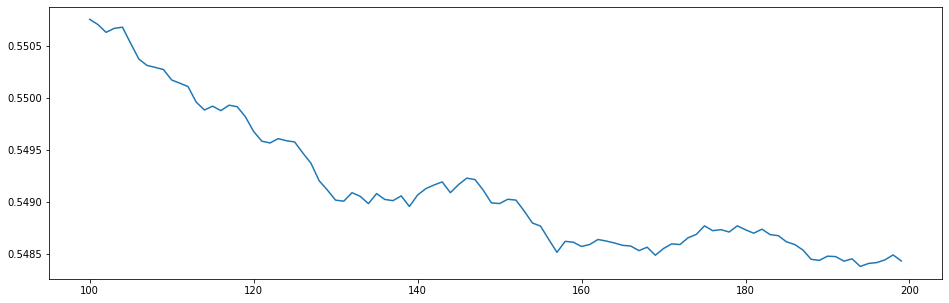

In [48]:
plt.figure(figsize = (16,5))
plt.plot(cv_results['test-rmse-mean'][100:])
plt.show()

[Go to Index](#0)

### <a id='17'>8) CatBoost model</a>

In [49]:
#!pip install catboost

In [50]:
#making dictionary of all parameters for the model
parameters = {'eval_metric':['RMSE'],
              'learning_rate': [0.1], 
              'colsample_bylevel': [0.5,0.7,0.9],
              'max_depth': [5,7,9],
              'n_estimators': [50,100,200],
              'reg_lambda'   : [0.1,0.5,1,5]}

cat_reg = CatBoostRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_cat = RandomizedSearchCV(cat_reg,parameters, cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1, random_state=123) #10 Randomized search for 5-fold Cross Validation
grid_obj_cat.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_cat.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 2.5058755	total: 58ms	remaining: 11.5s
1:	learn: 2.3162371	total: 68.1ms	remaining: 6.74s
2:	learn: 2.1351766	total: 78.8ms	remaining: 5.18s
3:	learn: 1.9799801	total: 87.6ms	remaining: 4.29s
4:	learn: 1.8316175	total: 97.4ms	remaining: 3.8s
5:	learn: 1.6978022	total: 107ms	remaining: 3.46s
6:	learn: 1.5780245	total: 116ms	remaining: 3.19s
7:	learn: 1.4712577	total: 126ms	remaining: 3.04s
8:	learn: 1.3883559	total: 139ms	remaining: 2.94s
9:	learn: 1.3090424	total: 155ms	remaining: 2.95s
10:	learn: 1.2302388	total: 164ms	remaining: 2.82s
11:	learn: 1.1673511	total: 175ms	remaining: 2.74s
12:	learn: 1.1093557	total: 184ms	remaining: 2.64s
13:	learn: 1.0625557	total: 194ms	remaining: 2.57s
14:	learn: 1.0094740	total: 203ms	remaining: 2.5s
15:	learn: 0.9668767	total: 212ms	remaining: 2.44s
16:	learn: 0.9284764	total: 222ms	remaining: 2.39s
17:	learn: 0.8929337	total: 233ms	remaining: 2.35s
18:	learn: 0.8615498	total: 2

In [51]:
RandomSearchCV_Results = pd.DataFrame()
for i in grid_obj_cat.cv_results_['params']:
    RandomSearchCV_Results = pd.concat([RandomSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [52]:
RandomSearchCV_Results = pd.concat([RandomSearchCV_Results,
                                    pd.DataFrame(grid_obj_cat.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_cat.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_cat.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
RandomSearchCV_Results.sort_values("model_rank")

,reg_lambda,n_estimators,max_depth,learning_rate,eval_metric,colsample_bylevel,mean_fit_time,mean_cv_score,model_rank
7,0.1,200,7,0.1,RMSE,0.7,4.903566,0.311581,1
19,1,200,9,0.1,RMSE,0.7,11.806617,0.312385,2
1,0.1,100,9,0.1,RMSE,0.9,7.400342,0.333731,3
13,0.5,100,9,0.1,RMSE,0.7,6.520903,0.335637,4
9,0.1,200,5,0.1,RMSE,0.5,2.207561,0.338975,5
17,0.1,100,9,0.1,RMSE,0.5,5.351812,0.346899,6
16,0.1,100,7,0.1,RMSE,0.9,2.758925,0.347215,7
5,5,100,9,0.1,RMSE,0.5,5.391568,0.363031,8
4,1,50,9,0.1,RMSE,0.7,3.761187,0.382905,9
15,5,50,9,0.1,RMSE,0.7,3.365410,0.392402,10


In [53]:
grid_obj_cat.best_params_

{'colsample_bylevel': 0.7,
 'eval_metric': 'RMSE',
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_lambda': 0.1}

In [54]:
#making dictionary of all parameters for the model
parameters = {'eval_metric':['RMSE'],
              'learning_rate': [0.1], 
              'colsample_bylevel': [0.85,1],
              'max_depth': [7,8,9],
              'n_estimators': [150,200,300],
              'reg_lambda'   : [0.05,0.1,1]}

cat_reg = CatBoostRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_cat = GridSearchCV(cat_reg,parameters, cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_cat.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_cat.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0:	learn: 2.4772507	total: 36ms	remaining: 10.8s
1:	learn: 2.2838797	total: 64.4ms	remaining: 9.6s
2:	learn: 2.1001918	total: 91.4ms	remaining: 9.05s
3:	learn: 1.9380428	total: 120ms	remaining: 8.85s
4:	learn: 1.7898728	total: 148ms	remaining: 8.73s
5:	learn: 1.6593662	total: 177ms	remaining: 8.65s
6:	learn: 1.5471920	total: 206ms	remaining: 8.62s
7:	learn: 1.4366548	total: 237ms	remaining: 8.65s
8:	learn: 1.3416882	total: 270ms	remaining: 8.73s
9:	learn: 1.2602072	total: 299ms	remaining: 8.66s
10:	learn: 1.1870687	total: 327ms	remaining: 8.58s
11:	learn: 1.1173320	total: 356ms	remaining: 8.55s
12:	learn: 1.0571431	total: 385ms	remaining: 8.5s
13:	learn: 1.0073254	total: 414ms	remaining: 8.46s
14:	learn: 0.9608684	total: 450ms	remaining: 8.56s
15:	learn: 0.9161397	total: 481ms	remaining: 8.53s
16:	learn: 0.8781432	total: 509ms	remaining: 8.48s
17:	learn: 0.8440010	total: 538ms	remaining: 8.43s
18:	learn: 0.8142110	total: 568

In [55]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_cat.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [56]:
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_cat.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_cat.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_cat.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,colsample_bylevel,eval_metric,learning_rate,max_depth,n_estimators,reg_lambda,mean_fit_time,mean_cv_score,model_rank
53,1,RMSE,0.1,9,300,1,18.103075,0.294298,1
17,0.85,RMSE,0.1,8,300,1,13.236495,0.296097,2
51,1,RMSE,0.1,9,300,0.05,19.857281,0.296506,3
34,1,RMSE,0.1,7,300,0.1,7.912835,0.296511,4
15,0.85,RMSE,0.1,8,300,0.05,12.859322,0.297985,5
33,1,RMSE,0.1,7,300,0.05,8.146602,0.300532,6
52,1,RMSE,0.1,9,300,0.1,19.528336,0.300595,7
24,0.85,RMSE,0.1,9,300,0.05,22.102940,0.301092,8
25,0.85,RMSE,0.1,9,300,0.1,22.322632,0.301120,9
16,0.85,RMSE,0.1,8,300,0.1,12.862908,0.301186,10


In [57]:
grid_obj_cat.best_params_

{'colsample_bylevel': 1,
 'eval_metric': 'RMSE',
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 300,
 'reg_lambda': 1}

In [58]:
#making dictionary of all parameters for the model
parameters = {'colsample_bylevel': [1],
 'eval_metric': ['RMSE'],
 'learning_rate': [0.1],
 'max_depth': [9],
 'n_estimators': [300],
 'reg_lambda': [1]}

cat_reg = CatBoostRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_cat = GridSearchCV(cat_reg,parameters, cv=3,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_cat.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_cat.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 2.4772507	total: 36.6ms	remaining: 10.9s
1:	learn: 2.2838797	total: 66.4ms	remaining: 9.89s
2:	learn: 2.1001918	total: 95.3ms	remaining: 9.43s
3:	learn: 1.9380428	total: 124ms	remaining: 9.21s
4:	learn: 1.7898728	total: 154ms	remaining: 9.09s
5:	learn: 1.6593662	total: 184ms	remaining: 9.01s
6:	learn: 1.5471920	total: 213ms	remaining: 8.94s
7:	learn: 1.4366548	total: 247ms	remaining: 9.02s
8:	learn: 1.3416882	total: 276ms	remaining: 8.93s
9:	learn: 1.2602072	total: 305ms	remaining: 8.85s
10:	learn: 1.1870687	total: 334ms	remaining: 8.77s
11:	learn: 1.1173320	total: 362ms	remaining: 8.69s
12:	learn: 1.0571431	total: 391ms	remaining: 8.62s
13:	learn: 1.0073254	total: 420ms	remaining: 8.59s
14:	learn: 0.9608684	total: 454ms	remaining: 8.63s
15:	learn: 0.9161397	total: 484ms	remaining: 8.59s
16:	learn: 0.8781432	total: 512ms	remaining: 8.53s
17:	learn: 0.8440010	total: 546ms	remaining: 8.55s
18:	learn: 0.8142110	total: 57

In [59]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_cat.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_cat.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_cat.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_cat.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,colsample_bylevel,eval_metric,learning_rate,max_depth,n_estimators,reg_lambda,mean_fit_time,mean_cv_score,model_rank
0,1,RMSE,0.1,9,300,1,15.929963,0.308514,1


[Go to Index](#0)

### <a id='18'>9) LGBoost model</a>

In [60]:
#making dictionary of all parameters for the model
parameters = {'objective':['regression'],
              'learning_rate': [0.1], 
              'max_depth': [5,7,9],
              'min_child_weight': [10,15,25],
              'colsample_bytree': [0.5, 0.7, 0.3],
              'n_estimators': [50,100,200],
              "reg_alpha"   : [0.5,1,5]}

lgb_reg = LGBMRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_lgb = RandomizedSearchCV(lgb_reg,parameters, cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1, random_state=123) #10 Randomized search for 5-fold Cross Validation
grid_obj_lgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_lgb.predict(df_1.iloc[:,1:])

r2_lgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
RandomSearchCV_Results = pd.DataFrame()
for i in grid_obj_lgb.cv_results_['params']:
    RandomSearchCV_Results = pd.concat([RandomSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [62]:
RandomSearchCV_Results = pd.concat([RandomSearchCV_Results,
                                    pd.DataFrame(grid_obj_lgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_lgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_lgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
RandomSearchCV_Results.sort_values("model_rank")

,reg_alpha,objective,n_estimators,min_child_weight,max_depth,learning_rate,colsample_bytree,mean_fit_time,mean_cv_score,model_rank
13,1,regression,200,10,9,0.1,0.7,1.002011,0.295704,1
2,0.5,regression,200,15,9,0.1,0.7,1.017467,0.299540,2
17,1,regression,200,25,9,0.1,0.5,0.818043,0.304004,3
14,0.5,regression,200,15,7,0.1,0.5,0.782713,0.304841,4
7,5,regression,200,25,9,0.1,0.5,0.825776,0.305327,5
10,1,regression,200,25,7,0.1,0.5,0.779812,0.306762,6
4,1,regression,100,10,7,0.1,0.5,0.473221,0.315975,7
9,0.5,regression,200,25,5,0.1,0.5,0.610515,0.316006,8
11,1,regression,100,10,5,0.1,0.7,0.437388,0.319317,9
0,0.5,regression,200,10,9,0.1,0.3,0.602722,0.327371,10


In [63]:
#making dictionary of all parameters for the model
parameters = {'objective':['regression'],
              'learning_rate': [0.1], 
              'max_depth': [7,9,11,13,15],
              'min_child_weight': [10],
              'colsample_bytree': [0.6,0.7],
              'n_estimators': [300,400,500],
              "reg_alpha"   : [0.1,0.5,1]}

lgb_reg = LGBMRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_lgb = GridSearchCV(lgb_reg,parameters, cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_lgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_lgb.predict(df_1.iloc[:,1:])

r2_lgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [64]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_lgb.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [65]:
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_lgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_lgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_lgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,objective,reg_alpha,mean_fit_time,mean_cv_score,model_rank
71,0.7,0.1,11,10,500,regression,1,2.275087,0.291640,1
59,0.7,0.1,9,10,400,regression,1,1.784957,0.291807,2
62,0.7,0.1,9,10,500,regression,1,2.271688,0.292088,3
68,0.7,0.1,11,10,400,regression,1,1.790050,0.292328,4
86,0.7,0.1,15,10,400,regression,1,1.819689,0.292405,5
...,...,...,...,...,...,...,...,...,...,...
45,0.7,0.1,7,10,300,regression,0.1,1.354677,0.297659,86
82,0.7,0.1,15,10,300,regression,0.5,1.417041,0.297845,87
85,0.7,0.1,15,10,400,regression,0.5,1.803465,0.297878,88
72,0.7,0.1,13,10,300,regression,0.1,1.386078,0.297962,89


In [66]:
grid_obj_lgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_child_weight': 10,
 'n_estimators': 500,
 'objective': 'regression',
 'reg_alpha': 1}

[Go to Index](#0)

### <a id='19'>10) Testing of Models</a>

In [67]:
model_list = []
y_test = df_2['windmill_generated_power']

In [68]:
#1. Fitting a simple Linear regression model and predicting using the test data
regr = linear_model.LinearRegression() 

regr.fit(df_1[["motor_torque"]], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2[["motor_torque"]])

In [69]:
#checking the scores on the test data
              
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["Simple Linear Regeression",r2,rmse,mae])

0.2468776243815305 2.309976013354612 1.3576806489177733


In [70]:
feat_names_fs

['motor_torque',
 'generator_temperature',
 'area_temperature',
 'engine_temperature',
 'blade_breadth',
 'speed_wind',
 'atmospheric_pressure',
 'atmospheric_temperature']

In [71]:
#2. Fitting a multiple Linear regression model in features obtained by forward selection and predicting using the test data
regr.fit(df_1.loc[:,feat_names_fs], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2.loc[:,feat_names_fs])

In [72]:
#checking the scores on the test data              
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["Multiple Linear Regeression(Forward Selection)",r2,rmse,mae])

0.4208375893447488 2.0256988350647616 1.2449238644599876


In [73]:
feat_names_be

['motor_torque',
 'generator_temperature',
 'area_temperature',
 'engine_temperature',
 'speed_wind',
 'atmospheric_temperature',
 'cloud_level_Low',
 'cloud_level_Medium']

In [74]:
#3. Fitting a multiple Linear regression model in features obtained by backward elemination and predicting using the test data
regr.fit(df_1.loc[:,feat_names_be], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2.loc[:,feat_names_be])

In [75]:
#checking the scores on the test data             
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["Multiple Linear Regeression(Backward Elimination)",r2,rmse,mae])

0.42322046207567143 2.021527330119317 1.24482320974879


In [76]:
#4. Fitting a Decision Tree model on features predicting using the test data
ypred = Decision_tree.predict(df_2.loc[:,l])   #predicting using the decision tree model

In [77]:
#checking the scores on the test data             
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["Decision Tree",r2,rmse,mae])

0.9438099567195476 0.6309637051483057 0.6031106345415194


In [78]:
#5. Fitting a Bagging model on features predicting using the test data
ypred = baggedModel.predict(df_2.loc[:,l])   #predicting using the decision tree model

In [79]:
#checking the scores on the test data            
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["Bagging Model",r2,rmse,mae])

0.9599619573163852 0.5326122045930498 0.5555050793521982


In [80]:
X_train = df_1.iloc[:,1:]
y_train = df_1.windmill_generated_power
X_test = df_2.iloc[:,1:]

In [81]:
#6. Fitting a Random Forest model on features predicting using the test data
randomForest = ensemble.RandomForestRegressor(n_estimators=94, max_features=0.6, oob_score=True, random_state=123)        
randomForest.fit(X_train,y_train) 
ypred = randomForest.predict(X_test)   #predicting using the decision tree model

In [82]:
#checking the scores on the test data
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["Random Forest",r2,rmse,mae])

0.9636351450929419 0.5075930000565386 0.5460518224157933


In [83]:
#7. Fitting a XGBoost model on features predicting using the test data
xg_reg = XGBRegressor(booster = 'gbtree',
 colsample_bytree= 0.7,
 learning_rate= 0.1,
 max_depth= 7,
 min_child_weight= 10,
 n_estimators= 200,
 objective= 'reg:squarederror',
 reg_alpha= 0.5,
 random_state=123,n_jobs=-1)
xg_reg.fit(X_train,y_train)

ypred = xg_reg.predict(X_test)

In [84]:
#checking the scores on the test data
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["XGBoost Model",r2,rmse,mae])

0.9628207562676188 0.5132452875721849 0.5626516463643766


In [85]:
#7.1. Fitting a XGBoost model on features predicting using the test data
xg_reg = XGBRegressor(booster = 'gbtree',
 colsample_bytree= 0.7,
 learning_rate= 0.1,
 max_depth= 7,
 min_child_weight= 10,
 n_estimators= 200,
 objective= 'reg:squarederror',
 reg_alpha= 0.5,
 num_parallel_tree=4,
 random_state=123,n_jobs=-1)
xg_reg.fit(X_train,y_train)

ypred = xg_reg.predict(X_test)

In [86]:
#checking the scores on the test data
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["XGBoost Model_Parallel_Trees",r2,rmse,mae])

0.9638798303102579 0.5058824180380338 0.5604783803787161


In [87]:
sorted_idx = xg_reg.feature_importances_.argsort()
px.bar(y=X_train.columns[sorted_idx] , x=xg_reg.feature_importances_[sorted_idx] , orientation='h', title='XGBoost Feature Importance')

> There is a function called permutation_importance in sklearn, this function interprets the feature importance based on the effect it has on model when it is included compared to when model doesn't have that feature for training. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html"> Click here to learn more</a>

In [88]:
perm_importance = permutation_importance(xg_reg, X_test, y_test, n_jobs=-1, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()
px.bar(y=X_train.columns[sorted_idx] , x=perm_importance.importances_mean[sorted_idx] , orientation='h', title='XGBoost Feature Permutation Importance')

In [89]:
#8. Fitting a CATBoost model on features predicting using the test data
cat_reg = CatBoostRegressor(colsample_bylevel= 1,
 eval_metric= 'RMSE',
 learning_rate= 0.1,
 max_depth= 9,
 n_estimators= 300,
 reg_lambda= 1,
random_state=123)
cat_reg.fit(X_train,y_train)
ypred = cat_reg.predict(X_test)

0:	learn: 2.4772507	total: 36.7ms	remaining: 11s
1:	learn: 2.2838797	total: 65.6ms	remaining: 9.78s
2:	learn: 2.1001918	total: 98ms	remaining: 9.71s
3:	learn: 1.9380428	total: 126ms	remaining: 9.31s
4:	learn: 1.7898728	total: 155ms	remaining: 9.15s
5:	learn: 1.6593662	total: 183ms	remaining: 8.98s
6:	learn: 1.5471920	total: 211ms	remaining: 8.84s
7:	learn: 1.4366548	total: 243ms	remaining: 8.88s
8:	learn: 1.3416882	total: 272ms	remaining: 8.79s
9:	learn: 1.2602072	total: 300ms	remaining: 8.69s
10:	learn: 1.1870687	total: 327ms	remaining: 8.59s
11:	learn: 1.1173320	total: 354ms	remaining: 8.51s
12:	learn: 1.0571431	total: 384ms	remaining: 8.47s
13:	learn: 1.0073254	total: 414ms	remaining: 8.46s
14:	learn: 0.9608684	total: 442ms	remaining: 8.41s
15:	learn: 0.9161397	total: 476ms	remaining: 8.44s
16:	learn: 0.8781432	total: 503ms	remaining: 8.38s
17:	learn: 0.8440010	total: 531ms	remaining: 8.31s
18:	learn: 0.8142110	total: 559ms	remaining: 8.26s
19:	learn: 0.7862027	total: 596ms	remainin

In [90]:
#checking the scores on the test data
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["CATBoost Model",r2,rmse,mae])

0.960298963565929 0.5303659291289945 0.57069780033317


Text(0.5, 1.0, 'CATBoost Feature Importance')

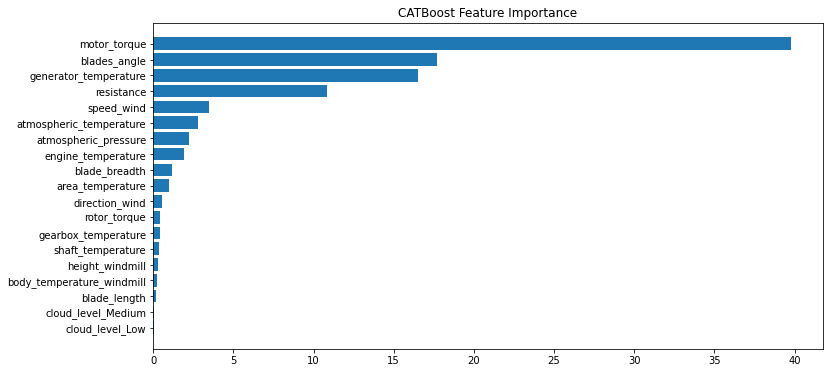

In [91]:
feature_importance = cat_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('CATBoost Feature Importance')

In [92]:
perm_importance = permutation_importance(cat_reg, X_test, y_test, n_jobs=-1, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()
px.bar(y=X_train.columns[sorted_idx] , x=perm_importance.importances_mean[sorted_idx] , orientation='h', title='CATBoost Feature Permutation Importance')

In [93]:
#9. Fitting a LGBoost model on features predicting using the test data
lgb_reg = LGBMRegressor(colsample_bytree= 0.6,
 learning_rate= 0.1,
 max_depth= 11,
 min_child_weight= 10,
 n_estimators= 500,
 objective= 'regression',
 reg_alpha= 0.1,
 random_state=123,n_jobs=-1) #initializing model with a random state for reproducibility
lgb_reg.fit(X_train,y_train)
ypred = lgb_reg.predict(X_test)

In [94]:
sorted_idx = lgb_reg.feature_importances_.argsort()
px.bar(y=X_train.columns[sorted_idx] , x=lgb_reg.feature_importances_[sorted_idx] , orientation='h', title='LGBoost Feature Importance')

In [95]:
perm_importance = permutation_importance(lgb_reg, X_test, y_test, n_jobs=-1, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()
px.bar(y=X_train.columns[sorted_idx] , x=perm_importance.importances_mean[sorted_idx] , orientation='h', title='LGBoost Feature Permutation Importance')

In [96]:
#checking the scores on the test data
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
mae = np.sqrt(mean_absolute_error(y_test,ypred))
print(r2,rmse,mae)
model_list.append(["LGBoost Model",r2,rmse,mae])

0.9621638974086508 0.517759280368501 0.5654712444315918


[Go to Index](#0)

### <a id='20'>11) Results: </a>

In [97]:
#printing the results in a dataframe
result_df = pd.DataFrame(model_list, columns = ["Model Name","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
result_df

,Model Name,R2,RMSE,MAE
0,Simple Linear Regeression,0.246878,2.309976,1.357681
1,Multiple Linear Regeression(Forward Selection),0.420838,2.025699,1.244924
2,Multiple Linear Regeression(Backward Elimination),0.423220,2.021527,1.244823
3,Decision Tree,0.943810,0.630964,0.603111
4,Bagging Model,0.959962,0.532612,0.555505
5,Random Forest,0.963635,0.507593,0.546052
6,XGBoost Model,0.962821,0.513245,0.562652
7,XGBoost Model_Parallel_Trees,0.963880,0.505882,0.560478
8,CATBoost Model,0.960299,0.530366,0.570698
9,LGBoost Model,0.962164,0.517759,0.565471


We have fitted the following models on the cleaned data and evaluateed the perforfamnce of each model using cross validation and hyperparameter tuning :
1. Simple Linear Regression with each indivisual feature
2. Multiple linear regression by forward sellection and backward elimination
3. Decision tree Regressor model
4. Bagging Regressor model
5. Random Forest regressor moodel
6. XGBoost Regressor model
7. CatBoost Regressor model
8. LightBoost Regressor model.

**Which model(s) do you think would be most appropriate and why?**

According to our observation during EDA, Decision tree based ensamble models will be the best performing model in this case because there is very less correlation between the predictors and target variables which suggets relationship between target variable and predictors is not linear in coefficients. This can be further validated by less value of R-square(0.44) for the Multiple Linear Regression model. As the relationship between target variable and predictors is not linear in coefficients decision tree models are performing better than other linear models. This can be validated by high value of R-square for Decision Tree model. The Random Forest is an enssemble model which uses multiple fully grown Decision Tree and aggregates output of all trees. Due to this the Random Forest model is very low bias and has less varience than a single Decision Tree. It chooses subset of features which does not suffer from the highly correlated Decision Trees like Bagging model. Hence we think that the Random Forest will be the most appropriate model for this dataset. Boosting models with broader range of hyperparameter tuning may outperform the Random Forest model but here we are finding that random forest is performing better than various boosting models like XGBoost, CatBoost & LightBoost. 


[Go to Index](#0)